# Importing the project

In [1]:
import os
os.chdir("C:\\Users\\Adhvaidh\\Desktop\\ML DATASETS\\LOGISTIC REG")
import pandas as pd
import numpy as np
ds=pd.read_csv("Social_Network_Ads.csv")

In [2]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Checking for missing values

In [3]:
pd.DataFrame(ds).isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Data frame to array conversion

In [4]:
x=ds.iloc[:,2:4].values #Independent variables

In [5]:
y=ds.iloc[:,4].values # Dependent variables

# Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

In [7]:
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

# Train-Test split (7:3)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.30, random_state=123)

# Modelling - Logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [10]:
y_pred=logmodel.predict(x_test)

In [11]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [12]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

# Accuracy - Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)

In [14]:
def accu_value(a):
    print("Accuracy = ",((a[0,0]+a[1,1])/(a[0,0]+a[0,1]+a[1,0]+a[1,1])))

                         


In [15]:
accu_value(cf)

Accuracy =  0.8416666666666667


# Building an ROC Curve

In [16]:
from sklearn.metrics import roc_auc_score
# lets measure the logistic model AUC
logistic_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test)) 
logistic_roc_auc

0.820144971307762

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])

In [18]:
logmodel.predict_proba(x_test)[:,1][:5] # P(Y=1)

array([0.61589422, 0.43031864, 0.30462914, 0.01504419, 0.25327438])

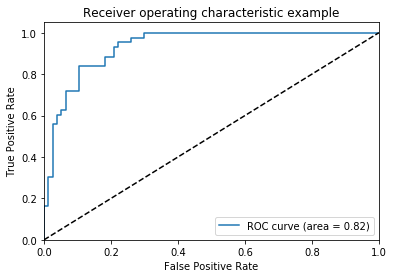

Logistic AUC = 0.82 


In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc ="lower right")
plt.show()
print("Logistic AUC = %2.2f " % logistic_roc_auc )